In [4]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [5]:
def boxplot_numpy_data(table_path):
    """
        Parse the columns of interaction frequencies, ignoring NA. 
        Generate a np.array of these frequencies and plot the 
        box and whisker plots for each of them.
    """
    xtick_labels = []
    data = []
    with open(table_path, 'rU') as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    darr = np.array(d)
    column_labels = list(darr[0,:])
    for exp_cond in darr[0,:][1:]:
        xtick_labels.append(exp_cond)
        exp_cond_index = column_labels.index(exp_cond)
        
        column_freq = []
        for row in darr[1:]:
            str_freq = row[exp_cond_index]
            if(str_freq != "NA"):
                column_freq.append(float(str_freq))
        data.append(column_freq)
    
    plt.figure(figsize=(12,7))
    plt.boxplot(data)
    plt.title("Distribution of water mediated-interaction frequency", fontsize=15)
    plt.ylabel("Water-mediated interaction frequency", fontsize=12)
    plt.xticks(range(1, len(xtick_labels)+1), xtick_labels, rotation="vertical", fontsize=12)
        
        

In [16]:
def boxplot_pandas_data(table_path):
    """
        Parse the columns of interaction frequencies, ignoring NA. 
        Generate a flattened pandas data frame with a row for every
        experiment condition -- gpcrdb1:gpcrdb2 -- frequency . 
    """
    data = []
    with open(table_path, 'rU') as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    darr = np.array(d)
    column_labels = list(darr[0,:])
    
    ### Arrays to populate a pandas data frame
    ec, gpcrdbpair, freqs = [], [], []
    for exp_cond in darr[0,:][1:]:
        exp_cond_index = column_labels.index(exp_cond)
        if(exp_cond_index <= 4): continue
        for row in darr[1:]:
            str_freq = row[exp_cond_index]
            if(str_freq != "NA"):
                ec.append(exp_cond)
                gpcrdbpair.append(row[0])
                freqs.append(float(str_freq))
    
    ### Generate pandas dataframe on flatened data
    df = pd.DataFrame({"exp_cond": ec, "interaction": gpcrdbpair, "freq": freqs})
    
    ### Generate box and whisker plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,7))
    ax = sns.boxplot(x="exp_cond", y="freq", data=df, color="White")
    plt.title("Distribution of water mediated-interaction frequency", fontsize=18)
    plt.ylabel("Water-mediated interaction frequency", fontsize=16)
    plt.xlabel("Receptor State", fontsize=16)
    plt.xticks(rotation=90, fontsize=14)
#     pp = PdfPages("foo.pdf")
#     pp.savefig()
#     pp.close()
    plt.savefig("interaction_freq_box_and_whisker.png", bbox_inches='tight')

    
    
    

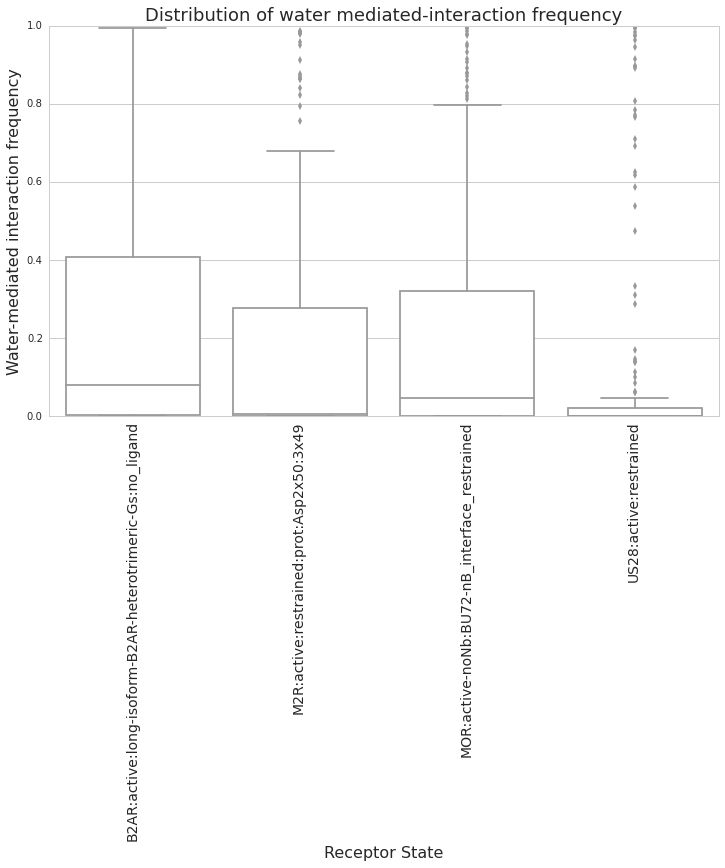

In [10]:
# active receptors

active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
df = boxplot_pandas_data(active_receptor_freqs)



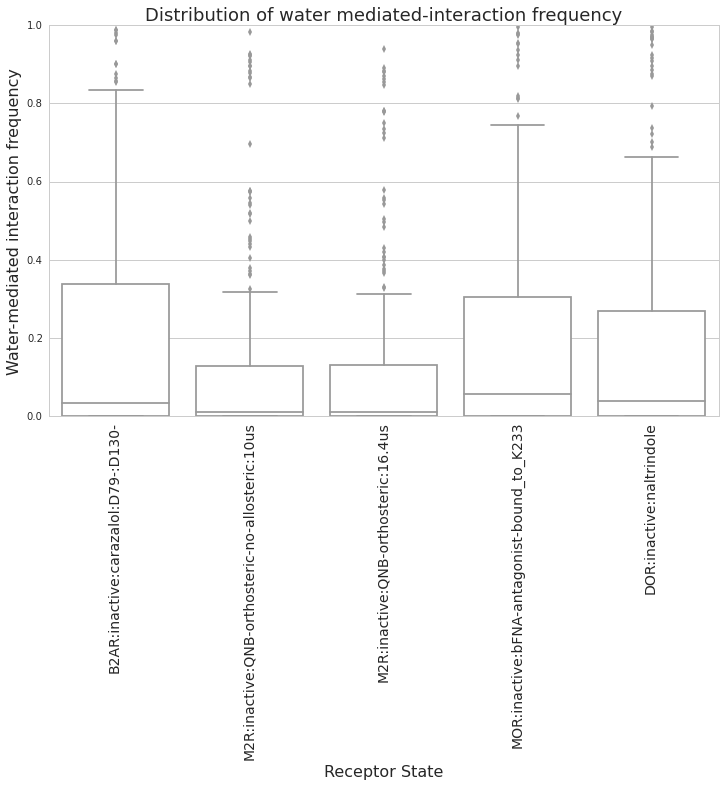

In [11]:
# inactive receptors

inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
df = boxplot_pandas_data(inactive_receptor_freqs)



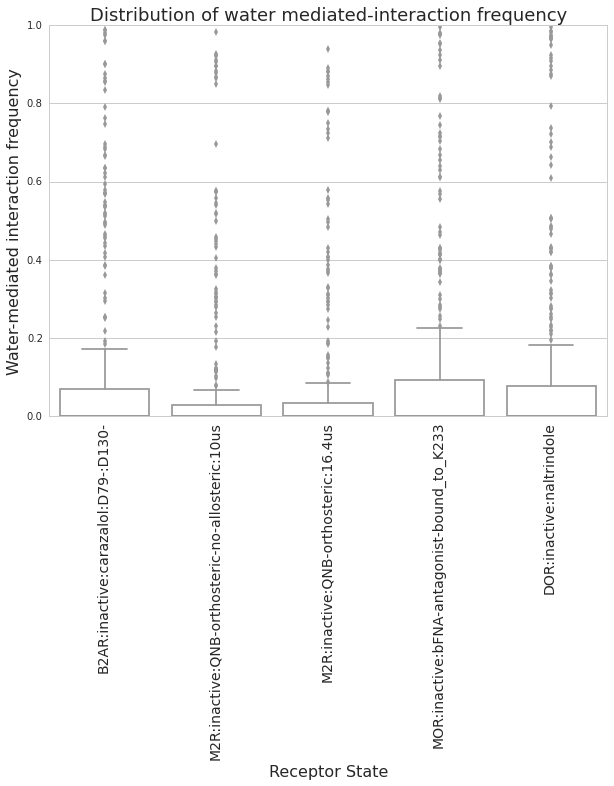

In [17]:
# all receptors

all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
df = boxplot_pandas_data(all_receptor_freqs)


In [197]:
tips = sns.load_dataset("tips")
print tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, dtype: float64


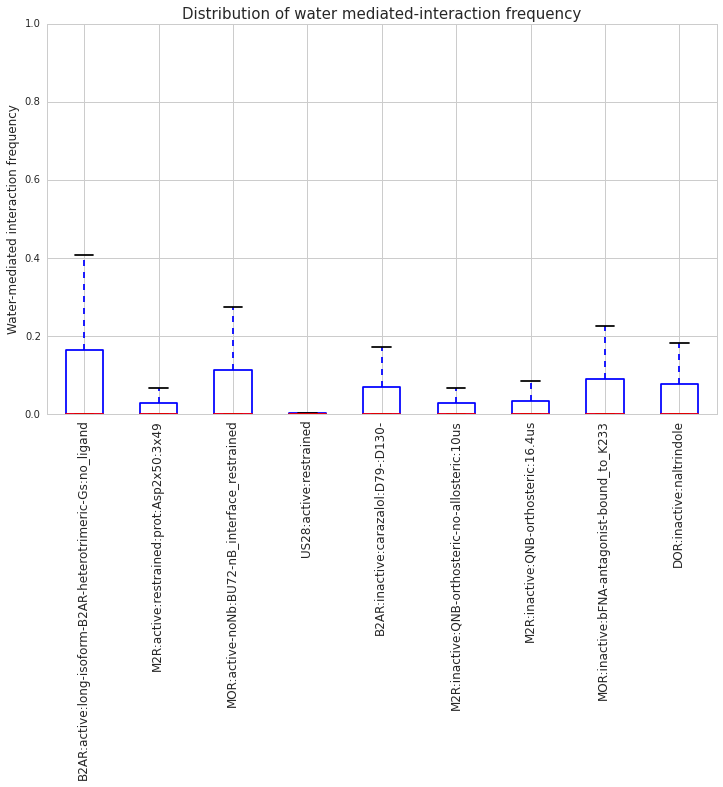

In [8]:
all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
boxplot_numpy_data(all_receptor_freqs)